<a href="https://colab.research.google.com/github/alejandro-robles7/fbai-mlops-assignments/blob/main/week_2/4B_MLOPs_ML_week_2_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning and Visualizations
In this assignment, we will look into supervised and unsupervised algorithms for ML modeling and visualization methods. Our intention is to identify misclassifications and understand the reason for such limitations. Are the limitations at model level or at data level? 

We start by loading libraries.


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

## Load the Handwritten digit data set
This data set is a simpler sub-sampled version of the MNIST data set (http://yann.lecun.com/exdb/mnist/), such that 

For additional details on the data set see [Introducing Scikit-Learn](05.02-Introducing-Scikit-Learn.ipynb)).

We are going to access the data from the sklearn datasets. We are going to use key function to display the keys from the digits dataset. More information on how to use keys function can be found at https://python-reference.readthedocs.io/en/latest/docs/dict/keys.html
Use the keys function to print the keys from the dataset below.

In [2]:
from sklearn.datasets import load_digits
digits = load_digits()

# Print keys from the digits dataset
# ADD YOUR CODE HERE
print(digits.keys())

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


We are going to print the shape of the dataset we have. Usage of the shape function can be found at https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shape.html

In [3]:
#Print the shape of data and target of the digits dataset

#ADD YOUR CODE HERE
print(digits['data'].shape, digits['target'].shape)

(1797, 64) (1797,)


To remind us what we're looking at, we'll visualize the first few data points:

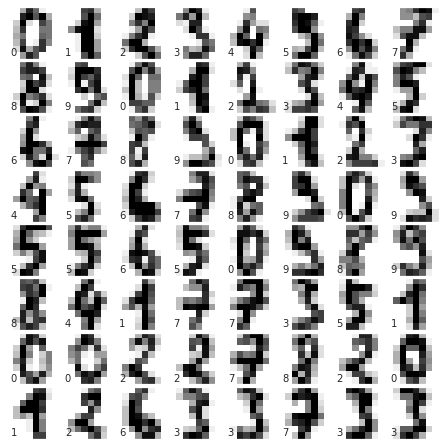

In [4]:
# set up the figure
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))

Matplotlib is a data visualization library used in Python. 
In the above code block, we are subploting the images from the dataset. 
For more information on Matplotlib see https://matplotlib.org/

Next, let us first split the data into training and testing.

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

Xtrain, Xtest, ytrain, ytest = train_test_split(digits.data, digits.target,
                                                random_state=42)
# Print shape of the splitted data

# ADD YOUR CODE HERE
print(Xtrain.shape, ytrain.shape, Xtest.shape)

(1347, 64) (1347,) (450, 64)


train_test_split function from sklearn splits the data in specified format. For more information on how train_test_split works, see https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

# Our first investigation is at model level. 
## Questions include:
* Can we identify a best data model that correctly identifies each digit?
* Can we identify samples that get misclassified by the best data model and understand why?




# Task 1: Fit a Random Forest Classifier and predict outcome on test data

In [6]:
model = RandomForestClassifier(n_estimators=500)
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)

We are using RandomForestClassifier to classify the digits for the above dataset. What other classifiers do you think can be used for the training ?
and Why ? For information on various classification models see https://monkeylearn.com/blog/classification-algorithms/

We can take a look at the classification report for this classifier:

In [7]:
from sklearn import metrics
print(metrics.classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.95      1.00      0.97        37
           2       1.00      1.00      1.00        38
           3       1.00      0.93      0.97        46
           4       0.98      1.00      0.99        55
           5       0.95      0.98      0.97        59
           6       0.98      0.98      0.98        45
           7       0.98      0.98      0.98        41
           8       0.95      0.95      0.95        38
           9       0.98      0.96      0.97        48

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



classification_report is the function used to evaluate the model and check the accuracy. We have talked about precision and recall in earlier assignment, f1-score is the harmonic mean of precision and recall. More information on classification_report can be found at https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

## Observe here, that the classification of digit '3' has most error (false positives), followed by digits '8' and '9'!
And for good measure, plot the confusion matrix:

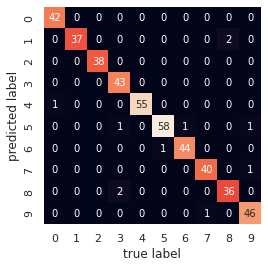

In [8]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, ypred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

Confusion_matrix is another matrix used to evaluate accuracy. A confusion matrix is a table that is often used to describe the performance of a classification model. For more information on confusion matrix https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62

In [9]:
# Write a function to print the number of erroneous classifications in test data. i.e. the sum of non diagonal entries
def sum_errors(mat):
  n=len(mat[0])
  #mat is a square matrix
  dia = np.diag_indices(n) # indices of diagonal elements
  dia_sum = sum(mat[dia]) # sum of diagonal elements
  off_dia_sum = np.sum(mat) - dia_sum # subtract the diagonal sum from total array sum
  return off_dia_sum

In [10]:
# Print the number of erroneors predictions by the random forest model
# ADD YOUR CODE HERE
print("Number of erroneors predictions by Random Forest=", sum_errors(mat))

Number of erroneors predictions by Random Forest= 11


# Task 2: Apply any other classifier (SVM, logistic regression, neural network etc.) and compare performance. Report the best model!

We are going to create the SVM algorithm for the next classifier. More information on how SVM works and its implementation can be found at https://scikit-learn.org/stable/modules/svm.html

In [11]:
from sklearn.svm import SVC

# Use the above link for reference and build a svm model using linear kernel 

# ADD YOUR CODE HERE
svc_model = SVC(kernel='linear')

In [12]:
# Use fit function from the link above to train the created model
# ADD THE TRAINING CODE HERE
svc_model.fit(Xtrain, ytrain)

# Use predict function from the link above to predict the values for Xtest using the created model
# ADD THE PREDICTION CODE HERE
ypred = svc_model.predict(Xtest)

In [13]:
# Print the classification report for the created smv model the way we did for random forest classifier.
# ADD YOUR CODE HERE
print(metrics.classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.97      1.00      0.99        37
           2       0.97      1.00      0.99        38
           3       0.98      0.93      0.96        46
           4       1.00      0.98      0.99        55
           5       0.97      1.00      0.98        59
           6       1.00      1.00      1.00        45
           7       0.98      0.98      0.98        41
           8       1.00      0.97      0.99        38
           9       0.96      0.96      0.96        48

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



# Observe here that the most error is still in digit '3' and then in '9'!

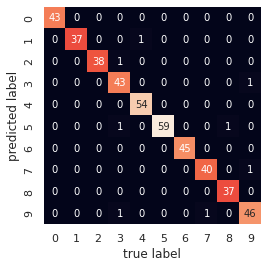

In [14]:
# Create a confusion matrix heatmap for the svm model the way we did for random forest

# ADD YOUR CODE HERE
mat = confusion_matrix(ytest, ypred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [15]:
# Print the number of erroneors predictions by the svm model
# ADD YOUR CODE HERE
print("Number of erroneors predictions by SVM=", sum_errors(mat))

Number of erroneors predictions by SVM= 8


## Next, let us try neural network classifier

Neural networks are a set of algorithms, modeled loosely after the human brain. For more information on neural networks see https://www.ibm.com/cloud/learn/neural-networks

MLPClassifier is a type of neural network implemented using sklearn. For more information on sklearn implementation see https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

In [16]:
from sklearn.neural_network import MLPClassifier
# Refering the above link implement a MLPClassifier model using the following configuration.
solver = 'adam'
alpha = 1e-5
hidden_layer_sizes = (500,)
random_state = 42

# ADD MODEL IMPLEMENTATION CODE BELOW
mlp_model = MLPClassifier(random_state=random_state, solver=solver, alpha=alpha, 
                    hidden_layer_sizes=hidden_layer_sizes)

# ADD TRAINING CODE USING fit METHOD REFERING THE LINK ABOVE
mlp_model.fit(Xtrain, ytrain)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(500,), random_state=42)

In [17]:
# Use predict function from the link above to predict the values for Xtest using the created model
# ADD THE PREDICTION CODE HERE
ypred = mlp_model.predict(Xtest)

In [18]:
# Print the classification report for neural network classifier the way we did for random forest classifier.
# ADD YOUR CODE HERE
print(metrics.classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.97      0.97      0.97        37
           2       0.95      1.00      0.97        38
           3       0.98      0.96      0.97        46
           4       1.00      1.00      1.00        55
           5       0.95      0.97      0.96        59
           6       0.98      0.98      0.98        45
           7       0.97      0.95      0.96        41
           8       1.00      0.95      0.97        38
           9       0.96      0.98      0.97        48

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



# Observe here, the worst performances are for digits '2', '7', '8'!

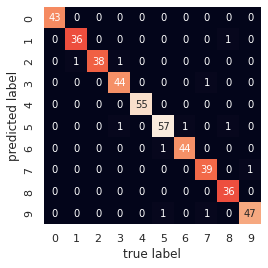

In [19]:
# Create a confusion matrix heatmap for neural network classifier the way we did for random forest

# ADD YOUR CODE HERE
mat = confusion_matrix(ytest, ypred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [20]:
# Print the number of erroneors predictions by the neural network classifier
# ADD YOUR CODE HERE
print("Number of erroneors predictions by Neural Network=", sum_errors(mat))

Number of erroneors predictions by Neural Network= 11


## Next, let us try logistic regression

Logistic Regression is an algorithm which is mostly used for binary classification. For more information on logistic regression see https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [21]:
from sklearn.linear_model import LogisticRegression

# Refering the link above, create a logistic regression model 
# ADD MODEL CREATION CODE HERE
lr_model = LogisticRegression()

# Train the created model using the fir function refering the link.
# ADD MODEL TRAINING CODE HERE
lr_model.fit(Xtrain, ytrain)


# Predict the trained model on Xtest using the predict function below
# ADD PREDICTION CODE HERE
ypred = lr_model.predict(Xtest)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Logistic Regression is an algorithm which is mostly used for binary classification. For more information on logistic regression see https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html 

In [22]:
# Print the classification report for logistic regression the way we did for random forest classifier.
# ADD YOUR CODE HERE
print(metrics.classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.97      0.97      0.97        37
           2       0.97      1.00      0.99        38
           3       0.98      0.96      0.97        46
           4       1.00      0.96      0.98        55
           5       0.95      0.97      0.96        59
           6       0.96      0.98      0.97        45
           7       1.00      0.98      0.99        41
           8       0.95      0.97      0.96        38
           9       0.96      0.96      0.96        48

    accuracy                           0.97       450
   macro avg       0.97      0.97      0.97       450
weighted avg       0.97      0.97      0.97       450



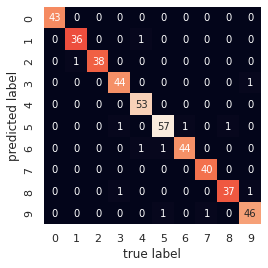

In [23]:
# Create a confusion matrix heatmap for logistic regression the way we did for random forest

# ADD YOUR CODE HERE
mat = confusion_matrix(ytest, ypred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [24]:
# Print the number of erroneors predictions by the logistic regression
# ADD YOUR CODE HERE
print("Number of erroneors predictions by Logistic Regression=", sum_errors(mat))

Number of erroneors predictions by Logistic Regression= 12


# Thus, at model-level, the best model is Linear SVM with least errors!
## Also, some digits of '3', and '8' and '9' are the most commonly misclassified. 
# Next, let us analyze at data-level to see if we can uncover some additional reasons for misclassification!

# Task 3: Apply k-means (unsupervised learning) to cluster training samples and predict digit cluster IDs for test data. What are the new learnings from unsupervised learning?
## Step 1: Load the necessary libraries

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

## Step 2: Use k-means to cluster training data (Xtrain) to 10 clusters. Although similar data points should appear ina  cluster, the cluster labels may differ from actual labels. i.e. cluster ID 1 may belong to digit label 8 and so on. So we have to reassign the cluster labels based on labels of most occuring samples per cluster.

## We prefer using all 64 features for this task, since the reduced dimension data (Xtrain_red) would incur higher error due to data compression. Xtrain_red is used for visualization only!

[OPTIONAL] For additional resources on k-means look at https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.11-K-Means.ipynb

KMeans is an unsupervised clustering algorthim. For more information on KMeans clustering see https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1
For implementation of KMeans clustering see
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [26]:
# Implement KMeans clustering for 10 clusters refering the above link.
# ADD IMPLEMENTATION CODE HERE
n_clusters = 10
k_model = KMeans(n_clusters=n_clusters, random_state=0)

# Train the clustering model using fit function refering the link.
# ADD TRAINING CODE HERE
k_model.fit(Xtrain)

# Print shape of the cluster_centers_ of the model refering the link.
# ADD PRINTING CODE HERE
print(k_model.cluster_centers_.shape)

(10, 64)


In [27]:
# Print the 64-dimensional cluster centers for the 10 data sample clusters

# ADD YOUR CODE HERE
print(k_model.cluster_centers_)

[[ 0.00000000e+00 -2.22044605e-16  4.16666667e-02  1.90277778e+00
   1.10555556e+01  1.32361111e+01  4.55555556e+00  3.19444444e-01
   2.60208521e-18  6.94444444e-02  2.13888889e+00  9.09722222e+00
   1.38194444e+01  1.31388889e+01  5.69444444e+00  3.19444444e-01
   2.16840434e-18  1.76388889e+00  9.04166667e+00  1.23055556e+01
   1.21944444e+01  1.36111111e+01  4.23611111e+00  1.11111111e-01
   6.50521303e-19  3.72222222e+00  1.19861111e+01  1.16666667e+01
   1.32916667e+01  1.38750000e+01  2.65277778e+00 -8.67361738e-19
   0.00000000e+00  1.62500000e+00  6.18055556e+00  6.97222222e+00
   1.15833333e+01  1.28611111e+01  1.72222222e+00  0.00000000e+00
  -6.93889390e-18  6.80555556e-01  1.73611111e+00  3.34722222e+00
   1.15416667e+01  1.20555556e+01  9.86111111e-01  1.38777878e-17
  -3.46944695e-18  4.16666667e-02  3.75000000e-01  3.06944444e+00
   1.25972222e+01  1.16388889e+01  1.70833333e+00  1.38777878e-16
   3.25260652e-19 -2.22044605e-16  1.77635684e-15  2.05555556e+00
   1.13750

## Step 2: Use the trained clusters to assign cluster IDs to Xtest

In [28]:
# Predict the trained model on Xtest using the predict function below
# ADD PREDICTION CODE HERE
ymeans = k_model.predict(Xtest)

## Step 3a: Let us visualize the samples that are the cluster **centers**

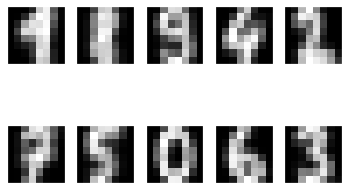

In [29]:
#Next, let us analyze the digits corresponding to the cluster centers, or samples that are easy to classify since they are far away from decision boundaries.
# This only helps visualization
fig, axes = plt.subplots(2,5, subplot_kw=dict(xticks=[], yticks=[]))
for ax, digit in zip(axes.flat, k_model.cluster_centers_):
    ax.imshow(digit.reshape(8,8), cmap="gray")

In [30]:
#Next, we create a function to reaasign cluster labels to actual digit labels
import scipy
def find_permutation(n_clusters, real_labels, labels):
    permutation=[]
    for i in range(n_clusters):
        idx = labels == i
        new_label=scipy.stats.mode(real_labels[idx])[0][0]  # Choose the most common label among data points in the cluster
        permutation.append(new_label)
    return permutation

## Step 3b: Use the cluster labels (k_model.labels_) and find_permutation function above to print the labels for the 10 image examples shown above.

In [31]:
from sklearn.metrics import accuracy_score
permutation3 = find_permutation(10, ytrain, k_model.labels_)
print("Cluster IDs from Xtrain now correspond to folllowing digits=",permutation3)

Cluster IDs from Xtrain now correspond to folllowing digits= [1, 1, 9, 4, 2, 7, 5, 0, 6, 3]


## Step 4: Check the accuracy for clustered IDS after applying find_permutation on Xtest.

In [32]:
perm_test=find_permutation(10,ytest, ymeans)
ym_labs=[perm_test[label] for label in ymeans]
print(ym_labs)

[6, 9, 3, 7, 2, 2, 5, 3, 5, 2, 8, 1, 4, 0, 4, 2, 3, 7, 9, 9, 4, 3, 9, 7, 5, 6, 3, 5, 6, 3, 4, 9, 2, 4, 4, 6, 9, 4, 7, 6, 6, 9, 8, 3, 6, 1, 3, 0, 6, 5, 5, 8, 9, 5, 6, 0, 9, 0, 0, 1, 0, 4, 5, 2, 4, 9, 7, 0, 7, 9, 9, 9, 9, 7, 7, 0, 4, 5, 9, 9, 9, 0, 2, 3, 9, 0, 6, 4, 4, 3, 8, 2, 8, 3, 9, 2, 9, 0, 4, 7, 4, 3, 5, 3, 1, 8, 5, 1, 4, 2, 7, 7, 4, 4, 1, 9, 8, 7, 9, 7, 2, 6, 9, 4, 0, 7, 2, 7, 5, 8, 7, 5, 7, 7, 0, 6, 6, 4, 2, 8, 0, 9, 4, 6, 9, 1, 6, 9, 0, 9, 9, 6, 6, 0, 6, 4, 9, 9, 3, 7, 7, 2, 9, 0, 4, 5, 3, 6, 5, 7, 9, 8, 4, 2, 8, 3, 7, 7, 2, 2, 3, 9, 9, 0, 3, 2, 3, 5, 6, 9, 9, 4, 8, 5, 4, 2, 3, 6, 4, 8, 9, 9, 5, 7, 8, 9, 4, 8, 8, 5, 4, 4, 9, 6, 8, 9, 6, 0, 4, 5, 2, 7, 1, 6, 4, 5, 6, 0, 3, 2, 3, 6, 7, 1, 9, 2, 4, 7, 6, 5, 8, 9, 5, 8, 0, 2, 8, 8, 7, 5, 7, 6, 2, 2, 2, 3, 4, 9, 8, 3, 6, 0, 9, 7, 7, 0, 8, 0, 4, 9, 8, 5, 3, 6, 0, 4, 2, 0, 0, 3, 6, 9, 9, 7, 3, 5, 9, 9, 9, 8, 5, 3, 3, 8, 0, 5, 8, 3, 4, 0, 2, 4, 6, 4, 3, 4, 9, 0, 5, 2, 2, 3, 1, 4, 8, 8, 7, 0, 8, 5, 2, 8, 2, 9, 7, 0, 6, 4, 8, 8, 5, 8, 8, 

In [33]:
acc_means = accuracy_score(ytest, ym_labs)
print("Accuracy on Xtest=", acc_means)

Accuracy on Xtest= 0.8044444444444444


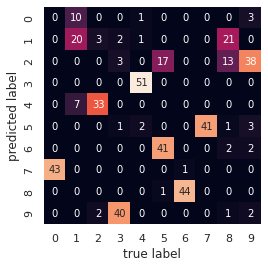

In [34]:
# Create a confusion matrix heatmap for cluster labels the way we did for random forest

# ADD YOUR CODE HERE
mat = confusion_matrix(ytest, ymeans)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

# Thus, we see that is we only look at the pixel-feature space, samples from digit '1', '5' and '8' end up in significant errors. So the decision boundaries along those digit clusters needs to be more accurately placed than the other clusters. 
#**What other observations do you make for unsupervised vs. supervised method applied to this digits data? List them here!**

# Task 4: Reduce the dimension of each sample from 64 to 3 (visible dimensions) using PCA. Then use Plotly OR Bokeh visualizations for the reduced dimension training and test data clusters. The goal is to identify sample clusters and verify which cluster samples need more attention than others.

## Step 1: Reduce the data dimensions to 3 principle components for visualization!

PCA is used for dimention reductionality for features. For more information on PCA see https://towardsdatascience.com/all-you-need-to-know-about-pca-technique-in-machine-learning-443b0c2be9a1
For PCA implementation information see https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

In [35]:
pca = PCA(n_components=3)
Xtrain_red = pca.fit_transform(Xtrain)
Xtest_red=pca.fit_transform(Xtest)


# Step 2: Visualize scatter plot for Xtest_red with original labels and with labels predicted from k-means

We are visualizing the original labels and predicted labels using scatter plot. The implementation of the scatter plot can be found at https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html#matplotlib.pyplot.scatter

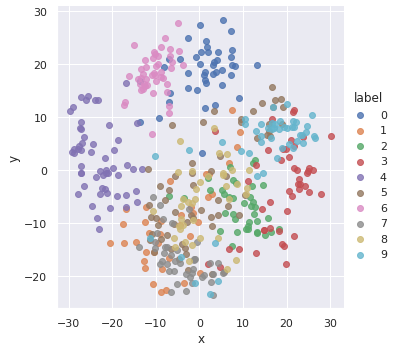

In [36]:
# Refer the above link to plot scatter plot for orginal data

# YOUR CODE HERE
# plt.scatter(Xtest_red[:, 0], Xtest_red[:, 1],  c=ytest)
# plt.legend(ytest)
import pandas as pd
dat1 = pd.DataFrame({'x': Xtest_red[:, 0], 'y': Xtest_red[:, 1],  'label': ytest})

facet = sns.lmplot(data=dat1, x='x', y='y', hue='label', 
                   fit_reg=False, legend=True)

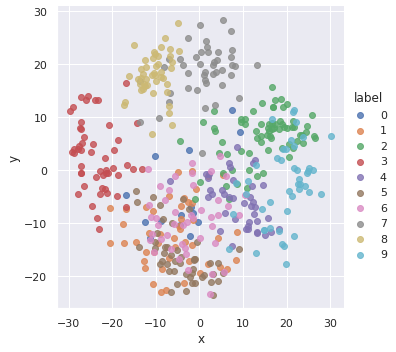

In [37]:
# Refer the above link to plot scatter plot for predicted labels

# YOUR CODE HERE
dat2 = pd.DataFrame({'x': Xtest_red[:, 0], 'y': Xtest_red[:, 1],  'label': ymeans})

facet = sns.lmplot(data=dat2, x='x', y='y', hue='label', 
                   fit_reg=False, legend=True)

## Notice that you can now find the clusters that are in error but it is still difficult to pinpoint erroneous cluster ids!

## Step 3: Install plotly or Bokeh

In [38]:
!pip install -q plotly==4.2.1

In [39]:
import pandas as pd
df = pd.DataFrame(Xtest_red, columns = ['PCA_1','PCA_2','PCA_3'])
df.insert(3, 'label', ytest, True)
df.insert(4, 'pred', ym_labs, True)

We are going to plot the PCA using scatter_3d. For more details on scatter_3d see https://plotly.com/python-api-reference/generated/plotly.express.scatter_3d

In [40]:
import plotly.express as px

# Plot a 3d scatter plot of label refering the above link 
# PLOTTING CODE HERE
px.scatter_3d(df, x='PCA_1',y='PCA_2',z='PCA_3', color='label')

# DISPLAY THE PLOT USING SHOW METHOD HERE
#plotly.show()

In [41]:
# Plot a 3d scatter plot of predeictions refering the above link 
# PLOTTING CODE HERE
px.scatter_3d(df, x='PCA_1',y='PCA_2',z='PCA_3', color='pred')

# DISPLAY THE PLOT USING SHOW METHOD HERE

# Now you can interact with the samples and identify the ones that are most likely to end up in error (ones along cluster boundaries) and ensure such samples are either:
* Denoised (deblurred) followed by classification.
* Or handled separately since they represent lower data quality!
